In [ ]:
# Code to plot results, comparing baseline model to 'optimized' model

<Figure size 1000x600 with 0 Axes>

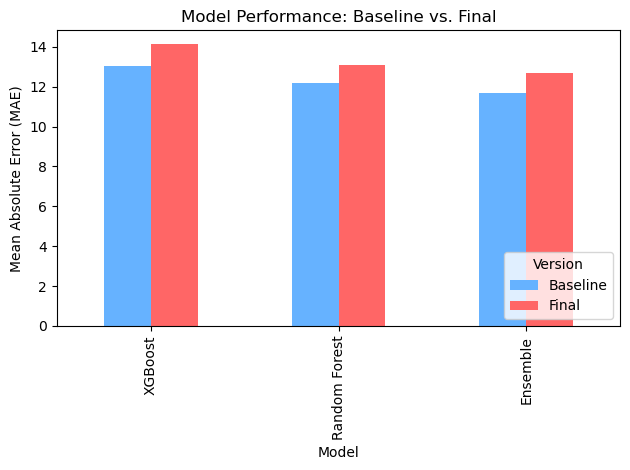

Plot saved successfully to plots/baseline_vs_final_performance.png.


In [ ]:
# Only plot used in final thesis version; MAE comparison baseline vs final models

import os
import pandas as pd
import matplotlib.pyplot as plt

# Create 'plots' folder if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Load MAE results
baseline_mae = pd.read_csv('baseline_results/baseline_mae.csv')
final_mae = pd.read_csv('optimized_results/optimized_mae.csv')  # Reuse the same file for final results

# Combine data for comparison
comparison_df = pd.merge(
    baseline_mae.rename(columns={'Baseline MAE': 'Baseline'}),
    final_mae.rename(columns={'Optimized MAE': 'Final'}),  # Rename 'Optimized MAE' to 'Final'
    on='Model'
)

# Plot baseline vs. final performance
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model')[['Baseline', 'Final']].plot(kind='bar', color=['#66B2FF', '#FF6666'])  # Adjusted color for final model
plt.title('Model Performance: Baseline vs. Final')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.legend(title='Version', loc='lower right')  # Move legend to bottom right
plt.tight_layout()

# Save the plot to the 'plots' folder
plot_path = 'plots/baseline_vs_final_performance.png'
plt.savefig(plot_path, dpi=300)
plt.show()

print(f"Plot saved successfully to {plot_path}.")


In [11]:
import pandas as pd

# Load the baseline feature SHAP file
baseline_file = 'baseline_results/baseline_feature_shap.csv'

try:
    # Load the data
    baseline_features = pd.read_csv(baseline_file)
    
    # Step 1: Remove columns 'Feature' and 'Feature.1'
    columns_to_remove = ['Feature', 'Feature.1']
    baseline_features = baseline_features.drop(columns=[col for col in columns_to_remove if col in baseline_features.columns])
    
    # Step 2: Rename 'Feature.2' to 'Feature'
    if 'Feature.2' in baseline_features.columns:
        baseline_features.rename(columns={'Feature.2': 'Feature'}, inplace=True)
    
    # Step 3: Remove ' SHAP' from values in the 'Feature' column
    if 'Feature' in baseline_features.columns:
        baseline_features['Feature'] = baseline_features['Feature'].str.replace(' SHAP', '', regex=False)
    
    # Step 4: Check the changes before saving
    print("Updated baseline features (first 5 rows):")
    print(baseline_features.head())
    
    print("\nColumn names after changes:")
    print(baseline_features.columns)
    
    print("\nSample 'Feature' column values:")
    print(baseline_features['Feature'].head())

    # Save confirmation step
    print("\nVerify the changes. Save the file if everything looks correct.")
    baseline_features.to_csv('baseline_results/baseline_feature_shap.csv', index=False)

except Exception as e:
    print(f"Error processing the baseline feature SHAP file: {e}")


Updated baseline features (first 5 rows):
                                            Feature  XGBoost SHAP  \
0            Resting-State_default mode network_AVG      0.582189   
1        Resting-State_dorsal attention network_AVG      0.323890   
2  Resting-State_frontoparietal control network_AVG      0.099785   
3                  Resting-State_limbic network_AVG      0.219754   
4                Resting-State_salience network_AVG      0.212891   

   Random Forest SHAP  
0            0.380300  
1            0.266062  
2            0.124026  
3            0.216386  
4            0.253841  

Column names after changes:
Index(['Feature', 'XGBoost SHAP', 'Random Forest SHAP'], dtype='object')

Sample 'Feature' column values:
0              Resting-State_default mode network_AVG
1          Resting-State_dorsal attention network_AVG
2    Resting-State_frontoparietal control network_AVG
3                    Resting-State_limbic network_AVG
4                  Resting-State_salience networ

<Figure size 1400x800 with 0 Axes>

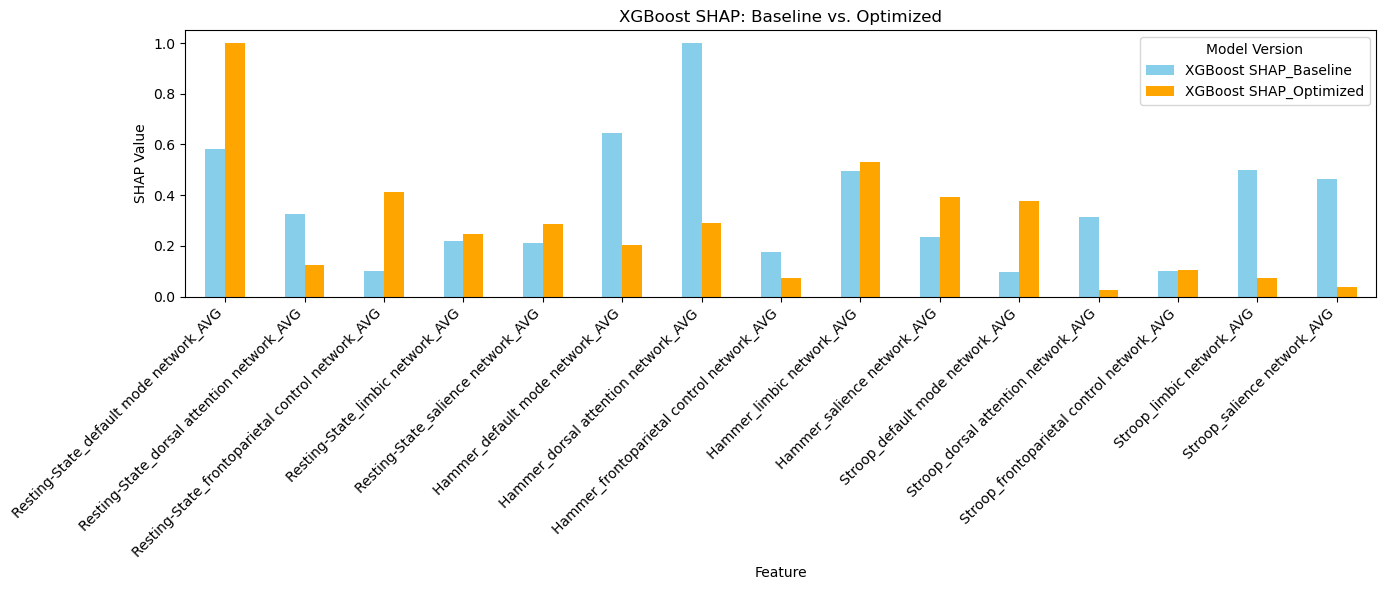

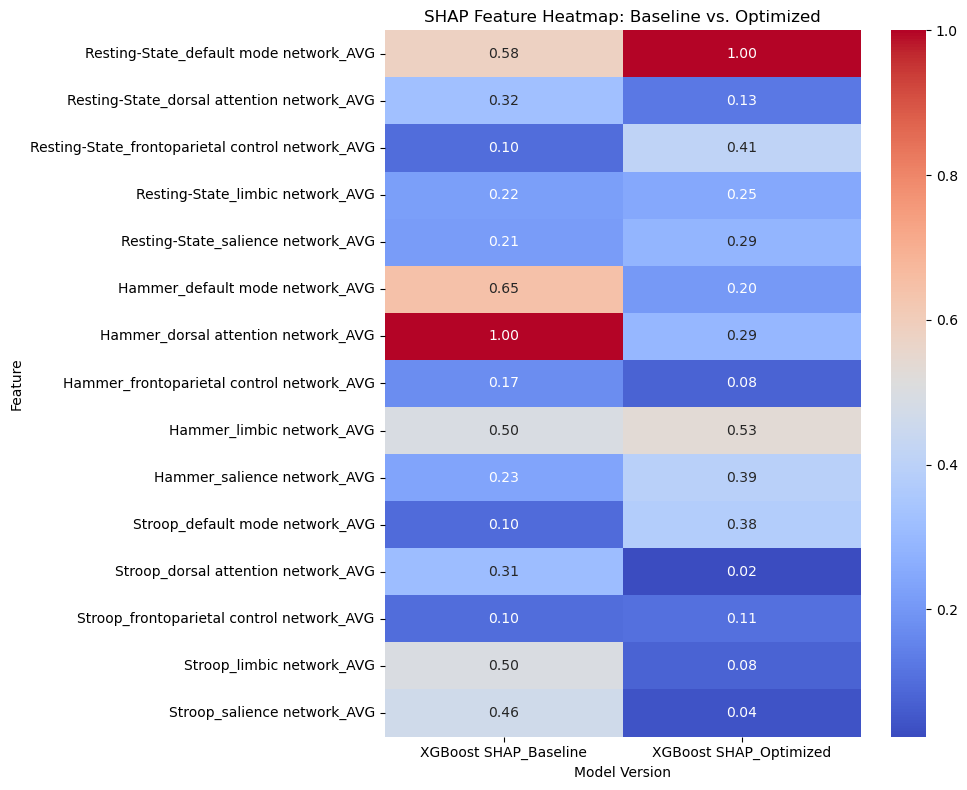

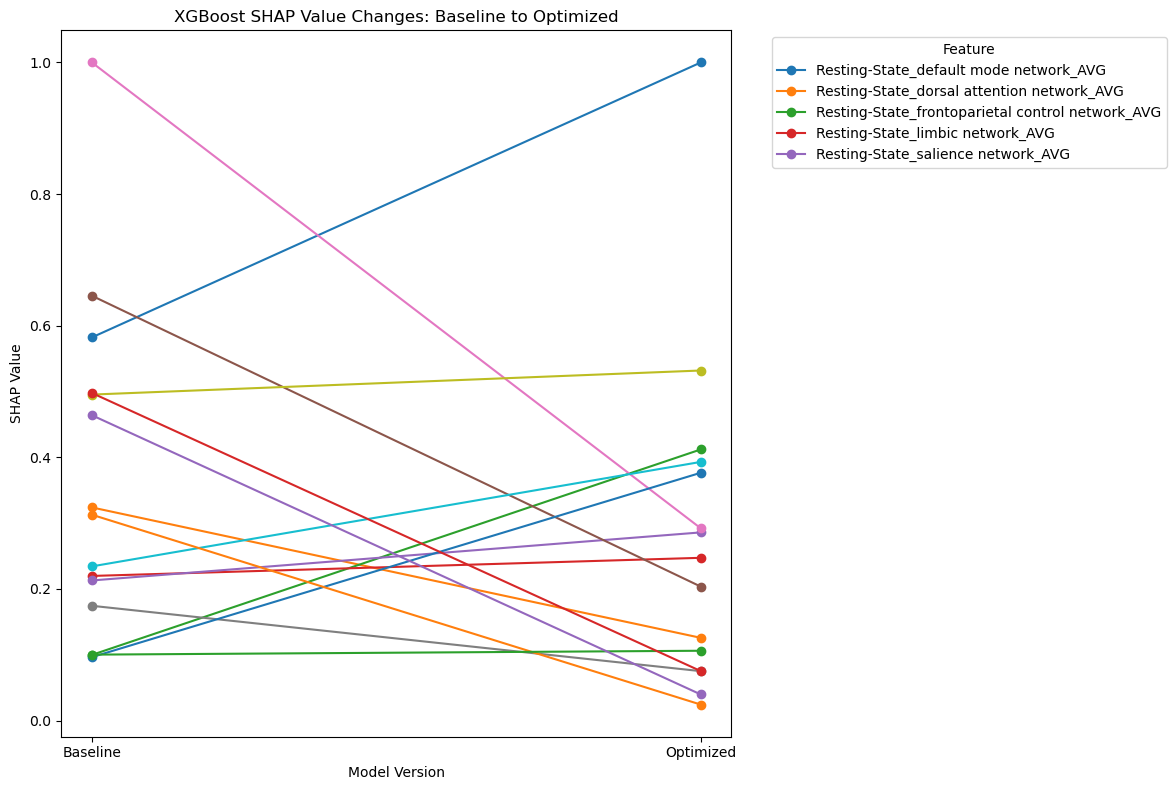

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load baseline and optimized feature SHAP values
baseline_file = 'baseline_results/baseline_feature_shap.csv'
optimized_file = 'optimized_results/optimized_feature_shap.csv'

# Load the data
baseline_features = pd.read_csv(baseline_file)
optimized_features = pd.read_csv(optimized_file)

# Merge baseline and optimized SHAP values on the 'Feature' column
comparison_df = pd.merge(
    baseline_features[['Feature', 'XGBoost SHAP', 'Random Forest SHAP']],
    optimized_features[['Feature', 'XGBoost SHAP', 'Random Forest SHAP']],
    on='Feature',
    suffixes=('_Baseline', '_Optimized')
)

# Plot 1: Side-by-side bar chart
plt.figure(figsize=(14, 8))
comparison_df.set_index('Feature')[['XGBoost SHAP_Baseline', 'XGBoost SHAP_Optimized']].plot(
    kind='bar', figsize=(14, 6), color=['skyblue', 'orange']
)
plt.title('XGBoost SHAP: Baseline vs. Optimized')
plt.ylabel('SHAP Value')
plt.xlabel('Feature')
plt.legend(title='Model Version')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/feature_importance_comparison_plot1.png')
plt.show()

# Plot 2: Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    comparison_df.set_index('Feature')[['XGBoost SHAP_Baseline', 'XGBoost SHAP_Optimized']],
    annot=True, fmt=".2f", cmap='coolwarm'
)
plt.title('SHAP Feature Heatmap: Baseline vs. Optimized')
plt.ylabel('Feature')
plt.xlabel('Model Version')
plt.tight_layout()
plt.savefig('plots/feature_importance_comparison_plot2.png')
plt.show()

# Plot 3: Scatterplot with connected lines
plt.figure(figsize=(12, 8))
for i, row in comparison_df.iterrows():
    plt.plot(
        ['Baseline', 'Optimized'],
        [row['XGBoost SHAP_Baseline'], row['XGBoost SHAP_Optimized']],
        marker='o',
        label=row['Feature'] if i < 5 else ""  # Label only the first 5 features for clarity
    )
plt.title('XGBoost SHAP Value Changes: Baseline to Optimized')
plt.ylabel('SHAP Value')
plt.xlabel('Model Version')
plt.xticks([0, 1], ['Baseline', 'Optimized'])
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/feature_importance_comparison_plot3.png')
plt.show()


<Figure size 1600x800 with 0 Axes>

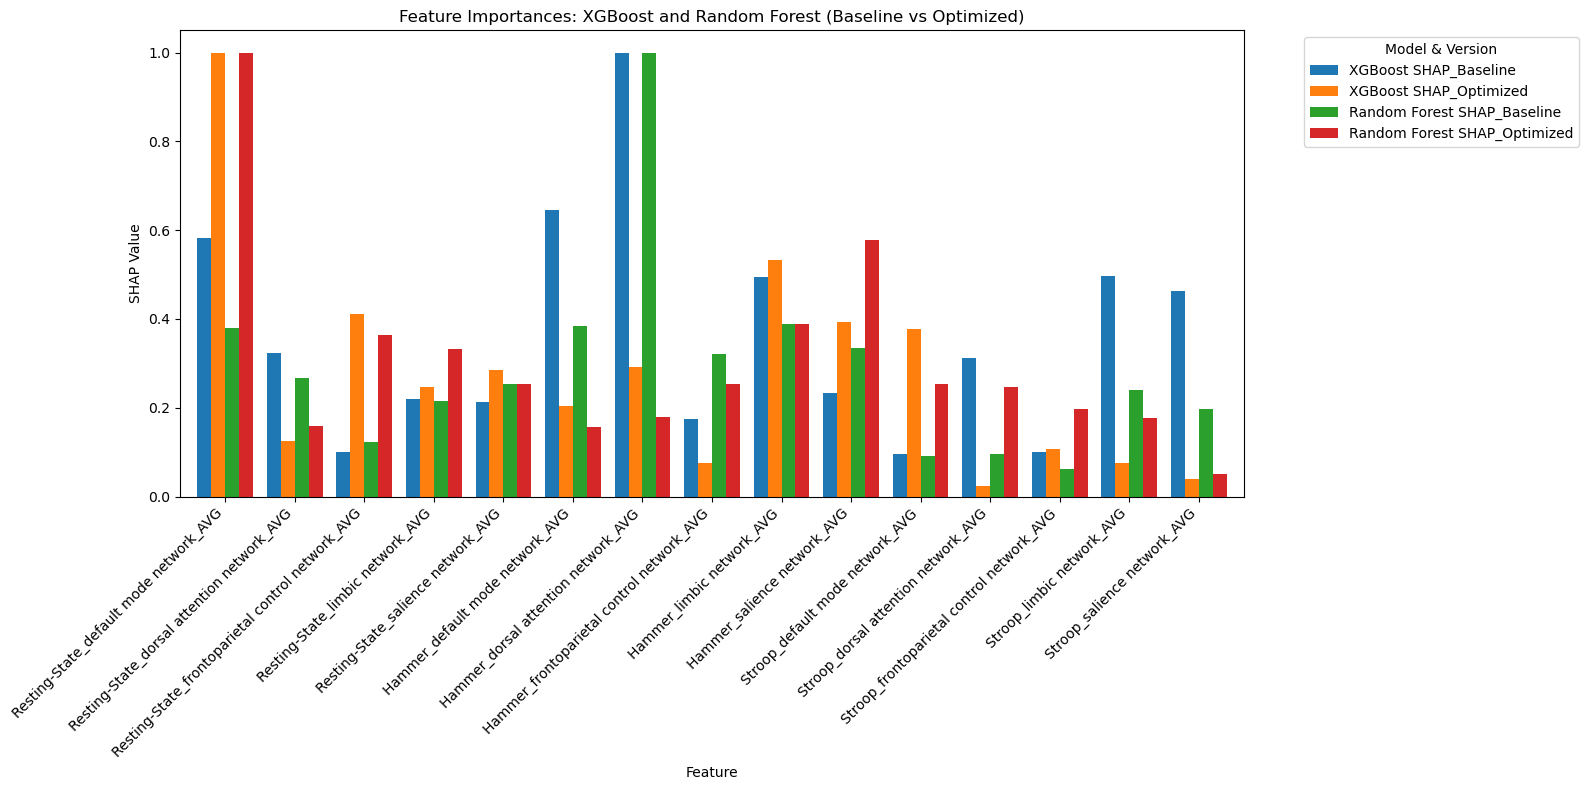

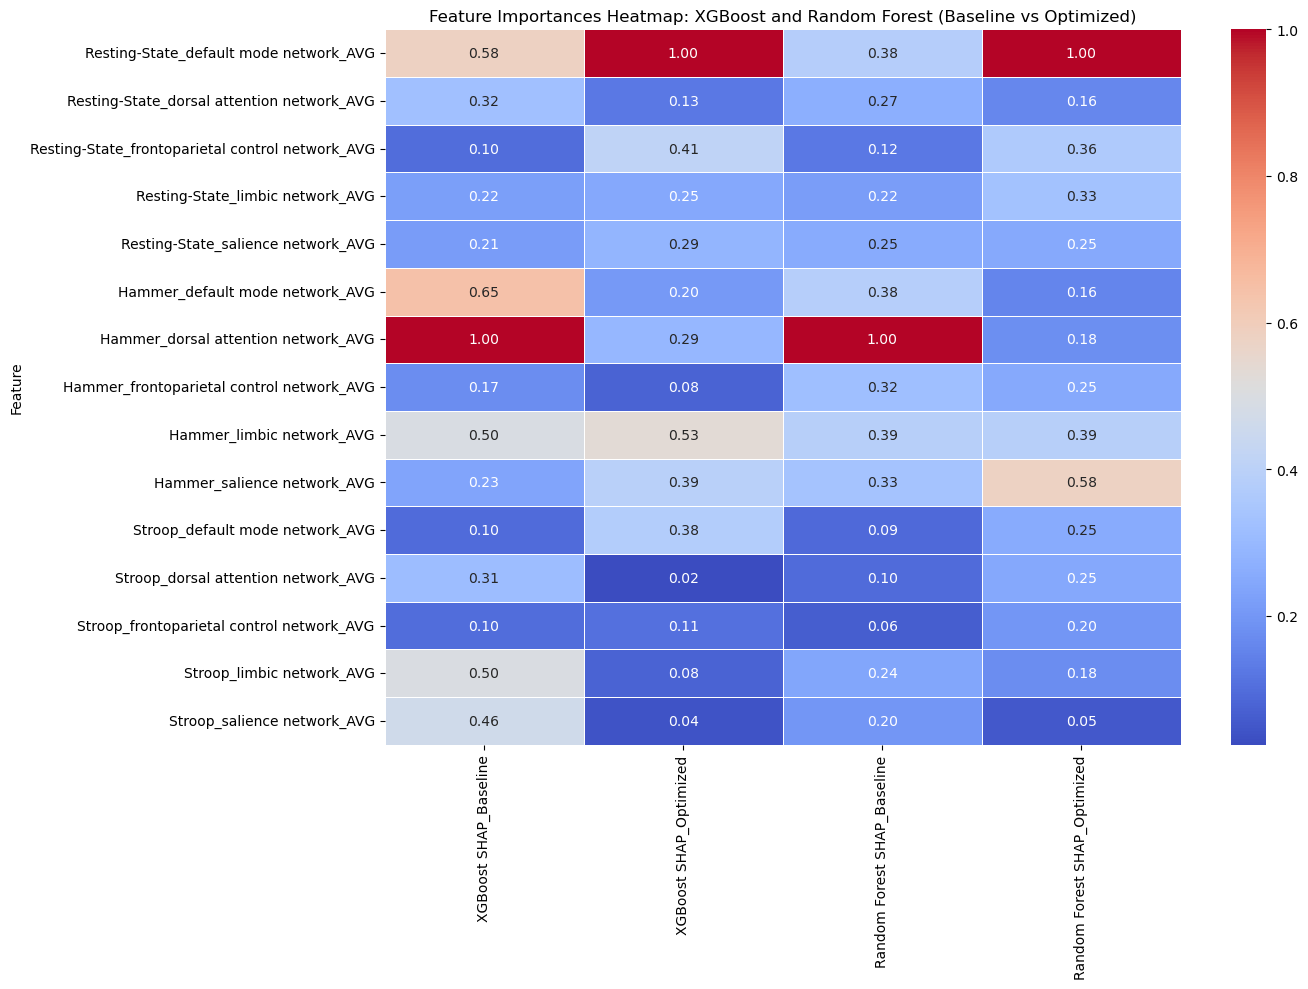

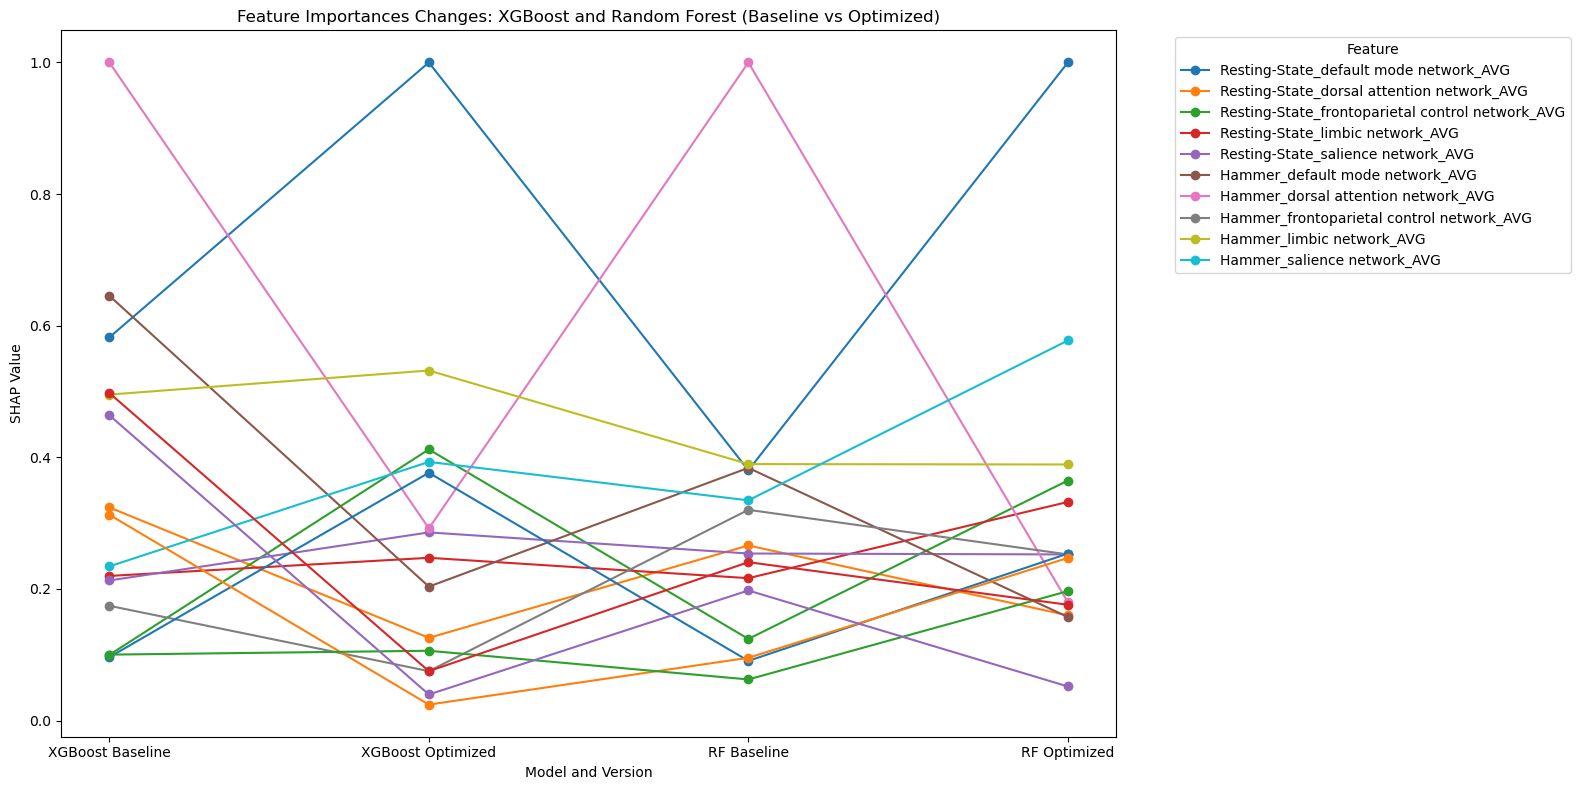

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load baseline and optimized feature SHAP values
baseline_file = 'baseline_results/baseline_feature_shap.csv'
optimized_file = 'optimized_results/optimized_feature_shap.csv'

# Load the data
baseline_features = pd.read_csv(baseline_file)
optimized_features = pd.read_csv(optimized_file)

# Merge baseline and optimized SHAP values on the 'Feature' column
comparison_df = pd.merge(
    baseline_features[['Feature', 'XGBoost SHAP', 'Random Forest SHAP']],
    optimized_features[['Feature', 'XGBoost SHAP', 'Random Forest SHAP']],
    on='Feature',
    suffixes=('_Baseline', '_Optimized')
)

# Plot 1: Grouped bar chart
plt.figure(figsize=(16, 8))
comparison_df.set_index('Feature')[[
    'XGBoost SHAP_Baseline', 'XGBoost SHAP_Optimized',
    'Random Forest SHAP_Baseline', 'Random Forest SHAP_Optimized'
]].plot(kind='bar', figsize=(16, 8), width=0.8)
plt.title('Feature Importances: XGBoost and Random Forest (Baseline vs Optimized)')
plt.ylabel('SHAP Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model & Version', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/combined_feature_importance_plot1.png')
plt.show()

# Plot 2: Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    comparison_df.set_index('Feature')[[
        'XGBoost SHAP_Baseline', 'XGBoost SHAP_Optimized',
        'Random Forest SHAP_Baseline', 'Random Forest SHAP_Optimized'
    ]],
    annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5
)
plt.title('Feature Importances Heatmap: XGBoost and Random Forest (Baseline vs Optimized)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('plots/combined_feature_importance_plot2.png')
plt.show()

# Plot 3: Line plot with markers
plt.figure(figsize=(16, 8))
for i, row in comparison_df.iterrows():
    plt.plot(
        ['XGBoost Baseline', 'XGBoost Optimized', 'RF Baseline', 'RF Optimized'],
        [
            row['XGBoost SHAP_Baseline'], row['XGBoost SHAP_Optimized'],
            row['Random Forest SHAP_Baseline'], row['Random Forest SHAP_Optimized']
        ],
        marker='o', label=row['Feature'] if i < 10 else ""  # Label only the first 10 features
    )
plt.title('Feature Importances Changes: XGBoost and Random Forest (Baseline vs Optimized)')
plt.ylabel('SHAP Value')
plt.xlabel('Model and Version')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/combined_feature_importance_plot3.png')
plt.show()
